In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
mallorca = pd.read_excel("Mallorca.xlsx")
mallorca = mallorca.drop(columns="Unnamed: 0", errors="ignore")
mallorca

,id,scrape_id,last_scraped,source,name,host_id,host_name,host_since,host_location,host_response_time,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count
0,69998,20241214212418,2024-12-15,city scrape,COZY HIDEAWAY LOFT... MI AMOR...,353156,Lor,2011-01-19,"Palma, Spain",within an hour,...,2024-10-26,4.95,4.92,4.93,4.95,4.97,4.89,4.81,t,2
1,106833,20241214212418,2024-12-15,city scrape,Villa with a big pool in Mallorca,551974,Xisco,2011-05-02,"Palma de Mallorca, Spain",NaN,...,2024-09-11,4.89,4.81,4.81,4.89,4.92,4.52,4.63,f,1
2,159218,20241214212418,2024-12-15,city scrape,Farmhouse in Nature -ET-3025,763897,Gabriel,2011-06-30,"Inca, Spain",within an hour,...,2024-10-27,4.92,4.88,4.93,4.96,4.95,4.82,4.75,f,1
3,164185,20241214212418,2024-12-15,city scrape,Corazón de Palma-Habitación con baño privado.,788123,Maria,2011-07-07,"Costa d'en Blanes, Spain",within an hour,...,2024-10-26,4.75,4.72,4.64,4.93,4.90,4.93,4.68,f,1
4,166820,20241214212418,2024-12-15,city scrape,Guest House with Great sea views - Principal Room,794829,Toni,2011-07-08,"Balearic Islands, Spain",within an hour,...,2024-10-08,4.67,4.75,4.35,4.87,4.91,4.94,4.60,t,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16862,1308224357787269888,20241214212418,2024-12-15,city scrape,Very Cosy and very central,588497055,Martina,2024-07-09,"Palma, Spain",within an hour,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1
16863,1308461808126489088,20241214212418,2024-12-15,city scrape,Habitación 5,587006009,Holidu,2024-07-02,"Palma, Spain",within an hour,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,83
16864,1308461814550170880,20241214212418,2024-12-15,city scrape,Habitación 4,587006009,Holidu,2024-07-02,"Palma, Spain",within an hour,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,83
16865,1308461822310863872,20241214212418,2024-12-15,city scrape,Habitación 3,587006009,Holidu,2024-07-02,"Palma, Spain",within an hour,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,83


In [11]:
mallorca_vn=mallorca.isnull().sum().sum()
mallorca_vn

np.int64(72672)

**Desviación Estándar**

<Figure size 1500x800 with 0 Axes>

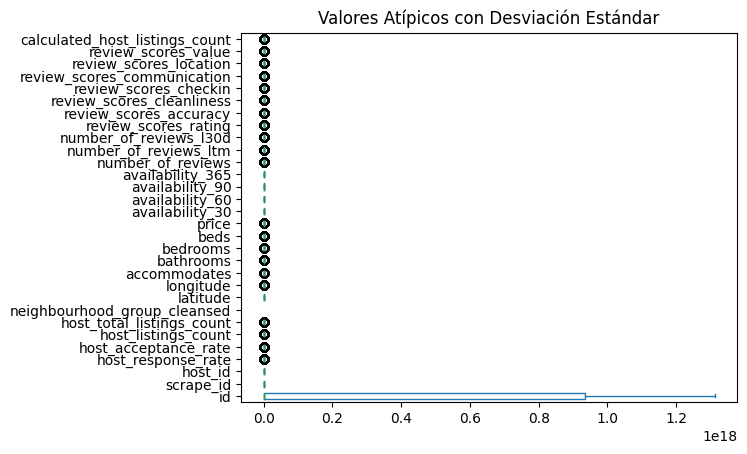

In [15]:
figsize_mallorca = plt.figure(figsize=(15,8))
mallorca.plot(kind="box", vert=False)
plt.title("Valores Atípicos con Desviación Estándar")
plt.show()

**Rango Intercuartílico**

<Figure size 1500x800 with 0 Axes>

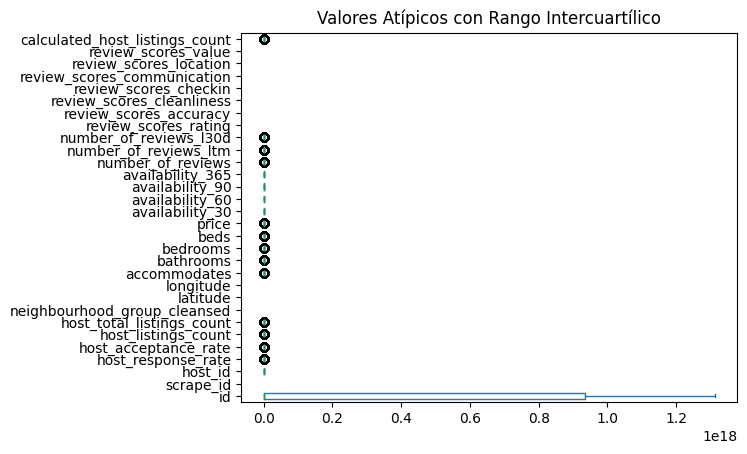

In [16]:
mallorca_cuanti=mallorca.select_dtypes(include=["float64","int64","float","int"])
mallorca_cuali=mallorca.select_dtypes(include=["object","datetime","category"])
y=mallorca_cuanti

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75-percentile25

Limite_Superior_iqr= percentile75+1.5*iqr
Limite_Inferior_iqr= percentile25-1.5*iqr

iqr=mallorca_cuanti[(y<=Limite_Superior_iqr)&y>=(Limite_Inferior_iqr)]
iqr2=iqr.fillna(round(iqr.mean(),1))
mallorca_iqr=pd.concat([mallorca_cuali,iqr2],axis=1)

figsize_mallorca = plt.figure(figsize=(15,8))
mallorca_iqr.plot(kind="box", vert=False)
plt.title("Valores Atípicos con Rango Intercuartílico")
plt.show()